## 1. The wine data set contains the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine.

In [12]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
from sklearn import datasets
wine = datasets.load_wine()

In [3]:
X = wine.data
y = wine.target

In [4]:
df_new = pd.DataFrame(X)
df_new.columns = wine.feature_names
df_new['target'] = y

In [15]:
df_new

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


### Explore the data graphically to select the features that have good potential to discriminate between the wine types

In [19]:
df_new.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

<AxesSubplot:>

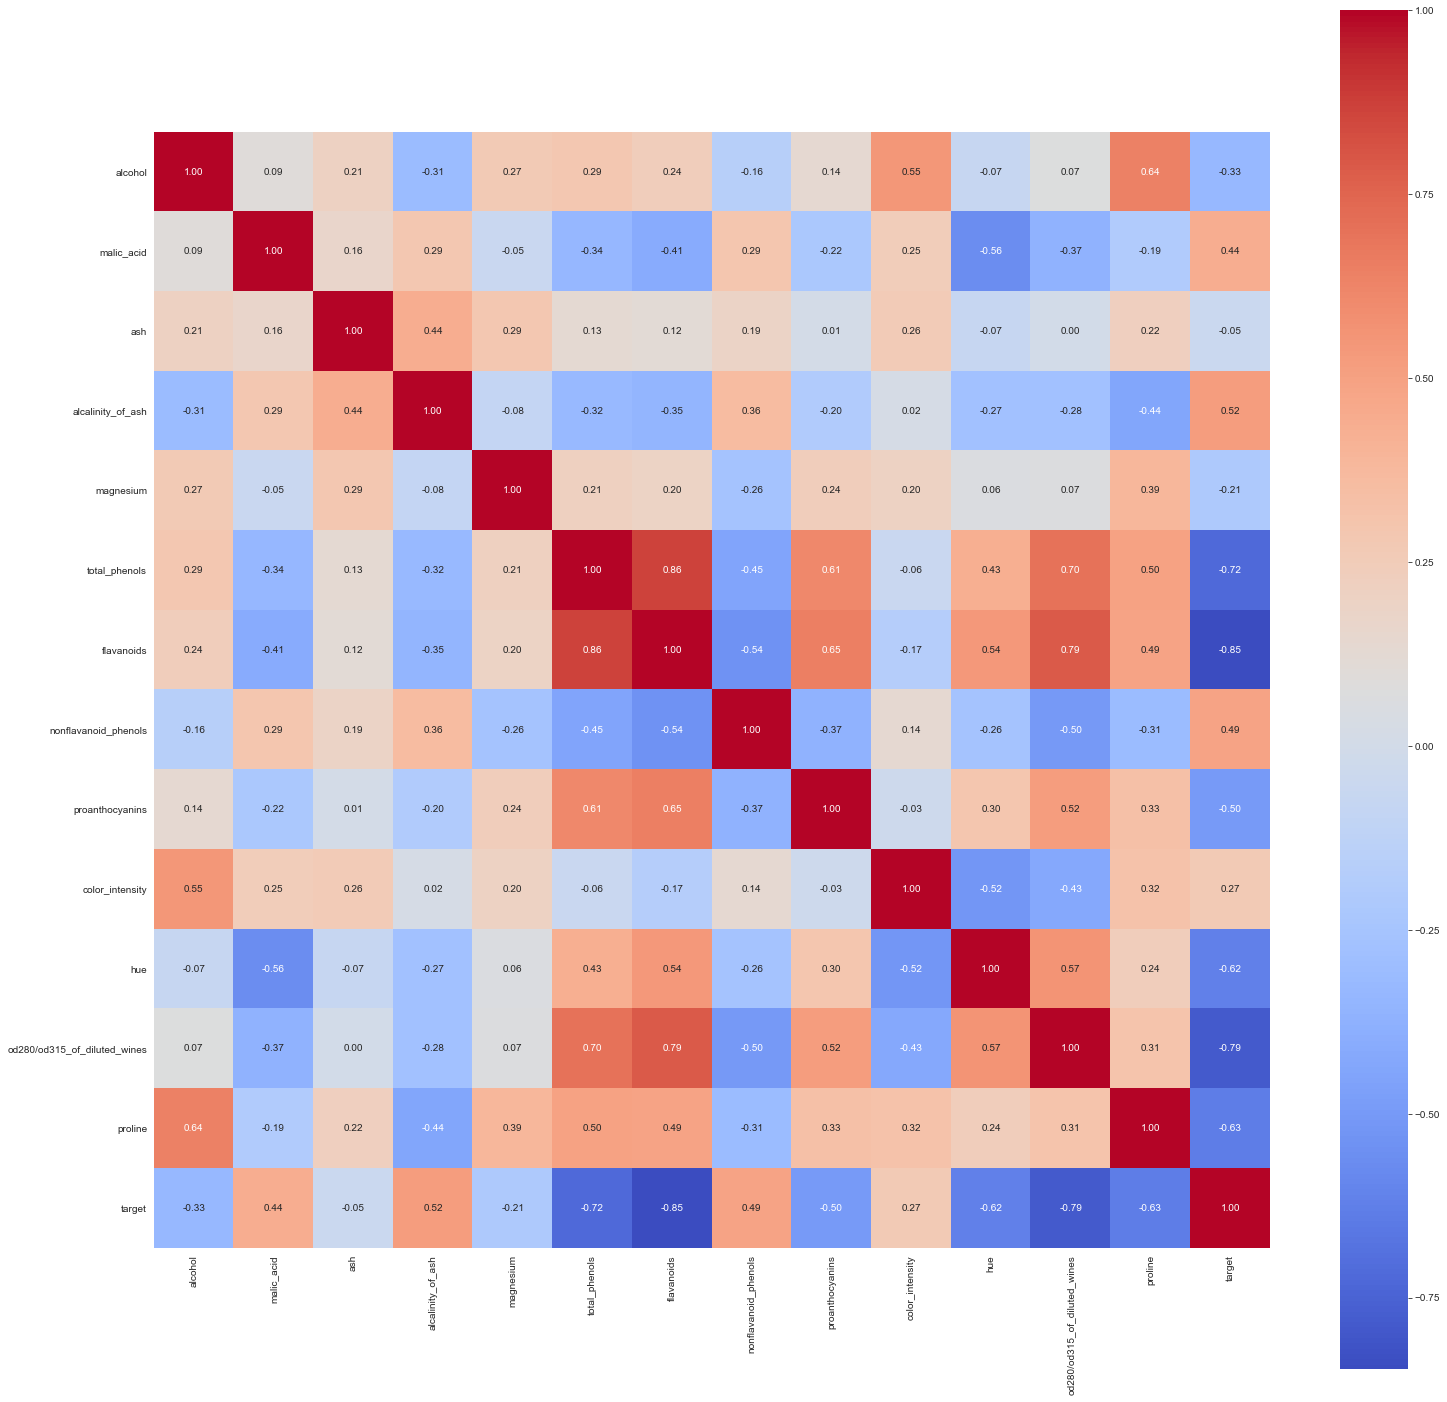

In [23]:
fig, axes = plt.subplots(1, 1, figsize=(25, 25))
sns.heatmap(df_new.corr(), vmax=1, square=True, annot=True,ax=axes,cmap='coolwarm',fmt=".2f")

#### Distributio plot

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

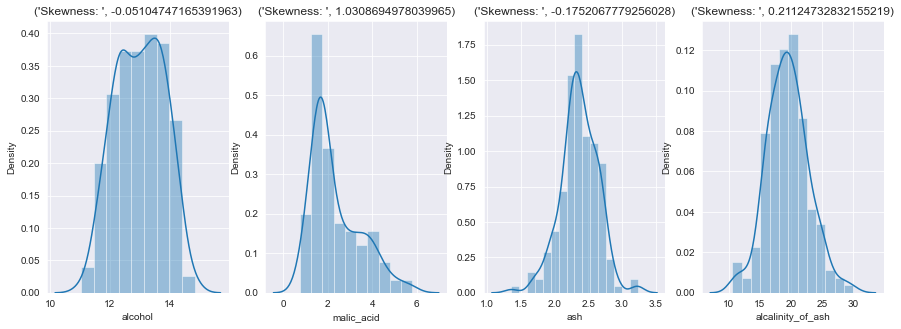

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

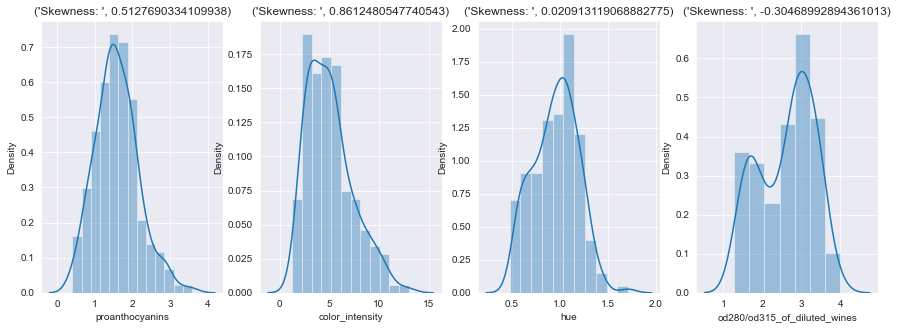

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

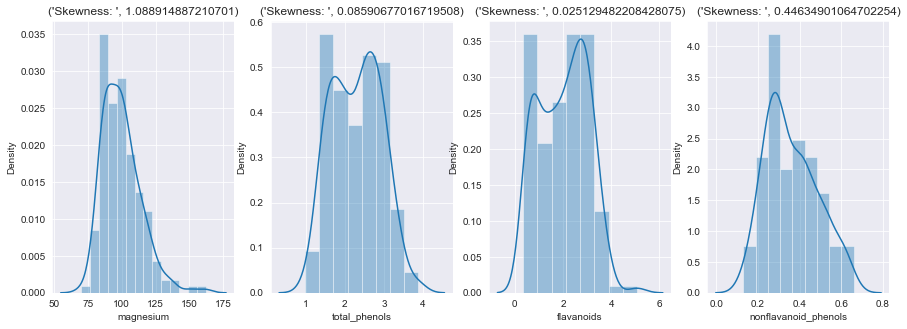

In [15]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
x= ['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash']
for i in range(len(x)):
    sns.distplot(df_new[x[i]],ax=axes[i])
    title = "Skewness: ",scipy.stats.skew(df_new[x[i]])   #,"/nSkewness: ",scipy.stats.skew(df[x[i]])

    axes[i].set_title(str(title))
plt.show()
    
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
x= ['proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines']
for i in range(len(x)):
    sns.distplot(df_new[x[i]],ax=axes[i])
    title = "Skewness: ",scipy.stats.skew(df_new[x[i]])   #,"/nSkewness: ",scipy.stats.skew(df[x[i]])

    axes[i].set_title(str(title))
plt.show()
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
x= ['magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols']
for i in range(len(x)):
    sns.distplot(df_new[x[i]],ax=axes[i])
    title = "Skewness: ",scipy.stats.skew(df_new[x[i]])   #,"/nSkewness: ",scipy.stats.skew(df[x[i]])

    axes[i].set_title(str(title))
    


#### from the above plot we can say that malic_acid, color_intensity, diluted_wines, magnesium are highly skewed.

In [ ]:
g = sns.PairGrid(df_new)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

#### Build Naïve Bayes classifier using these features.

In [5]:
from sklearn.naive_bayes import GaussianNB

In [7]:
df_new.columns
X = df_new[['alcohol', 'ash', 'alcalinity_of_ash',
            'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
            'proanthocyanins', 'hue','proline']]
y = df_new['target']

In [9]:
GNB = GaussianNB()
GNB.fit(X, y)

GaussianNB()

In [10]:
y_pred = GNB.predict(X)

#### Model evaluation

In [13]:
print(r2_score(y, y_pred))

0.9623778071334215


#### Output the confusion matrix. 

In [14]:
_type = np.array(y)
predictions = np.array(y_pred)
confusion_matrix(_type, predictions)

array([[58,  1,  0],
       [ 0, 69,  2],
       [ 0,  1, 47]], dtype=int64)

#### provide the visualization of decision boundaries with respect to the two most relevant quantitative features.

In [39]:
GNB = GaussianNB()
X = df_new[['alcohol','flavanoids']]
y = df_new['target']
GNB.fit(X, y)

GaussianNB()

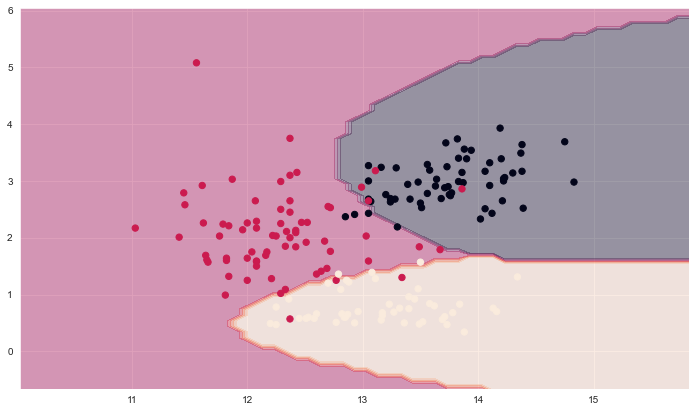

In [40]:
X = np.array(X)
X0_min, X0_max = X[:,0].min() - 1, X[:,0].max() + 1
X1_min, X1_max = X[:,1].min() - 1, X[:,1].max() + 1

x0, x1 = np.meshgrid(np.arange(X0_min, X0_max, 0.1),
                    np.arange(X1_min, X1_max, 0.1))
fig, ax = plt.subplots(1,1, figsize=(12, 7))
yy = GNB.predict(np.c_[x0.ravel(), x1.ravel()])
yy = yy.reshape(x0.shape)

ax.contourf(x0, x1, yy, alpha=0.4)
ax.scatter(X[:,0], X[:,1], c = y, s = 40)
